<a href="https://colab.research.google.com/github/MIA1kl/MlColorizingImages/blob/main/ColoredMlProjectMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colorizing Images Machine learning Project

## Project Overview

The goal of this project is to develop a machine-learning model that can automatically color grayscale images. The model will be trained on a dataset of colored images and will learn to predict the color values for each pixel in a grayscale image.

The end result of this project will be a machine learning model that can add colors to black and white images, producing visually appealing results that are comparable to human-created colorizations.

## Project Goals

### Data:
A dataset of colored images will be used to train the model. For the prediction, we will use a dataset of black-and-white images 

### Model Development:
Design and implement a deep learning model that takes grayscale images as input and outputs the corresponding color version. 

### Methods:
The project will use a convolutional neural network (CNN) to colorize the grayscale images. We will use LAB instead of RGB

### Training:
Train the model on the collected dataset using unsupervised learning techniques.

## Results before training (training with only one image):
## 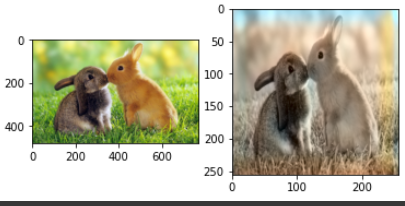
## 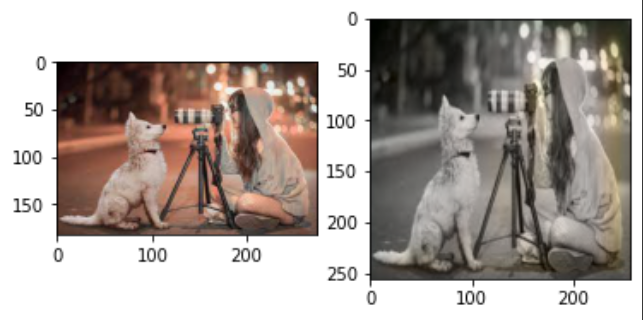

## Results with small amount of data:

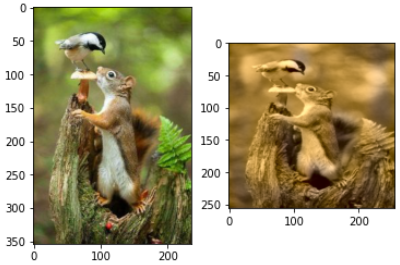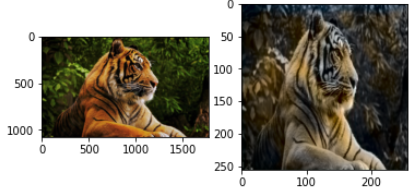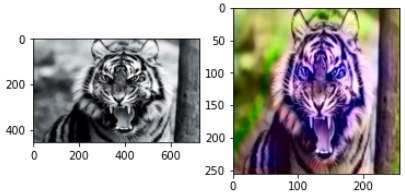

## Final results after training:

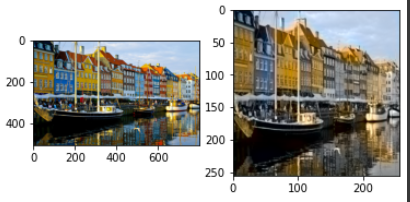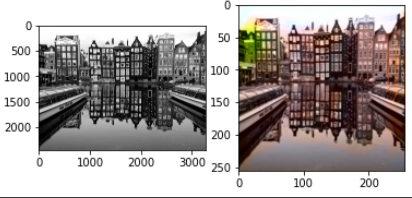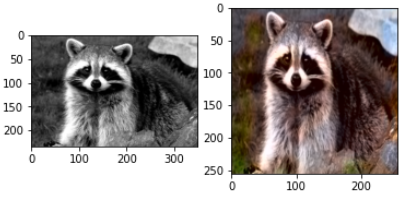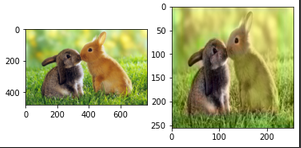

## RGB vs LAB:
RGB uses the three color channels "R" (red), "G" (green), "B" (blue)
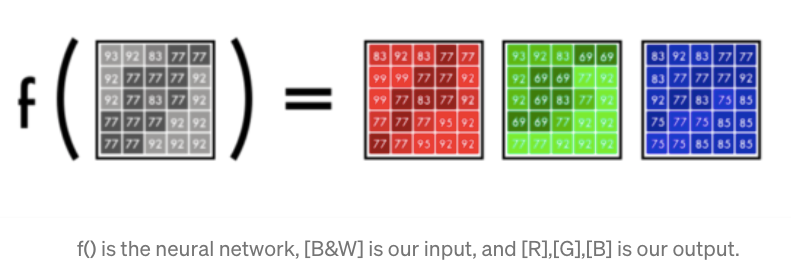

LAB uses the three channels representing “L” (lightness), “a” (Red/Green) and “b” (Blue/Yellow)
![image(2).png](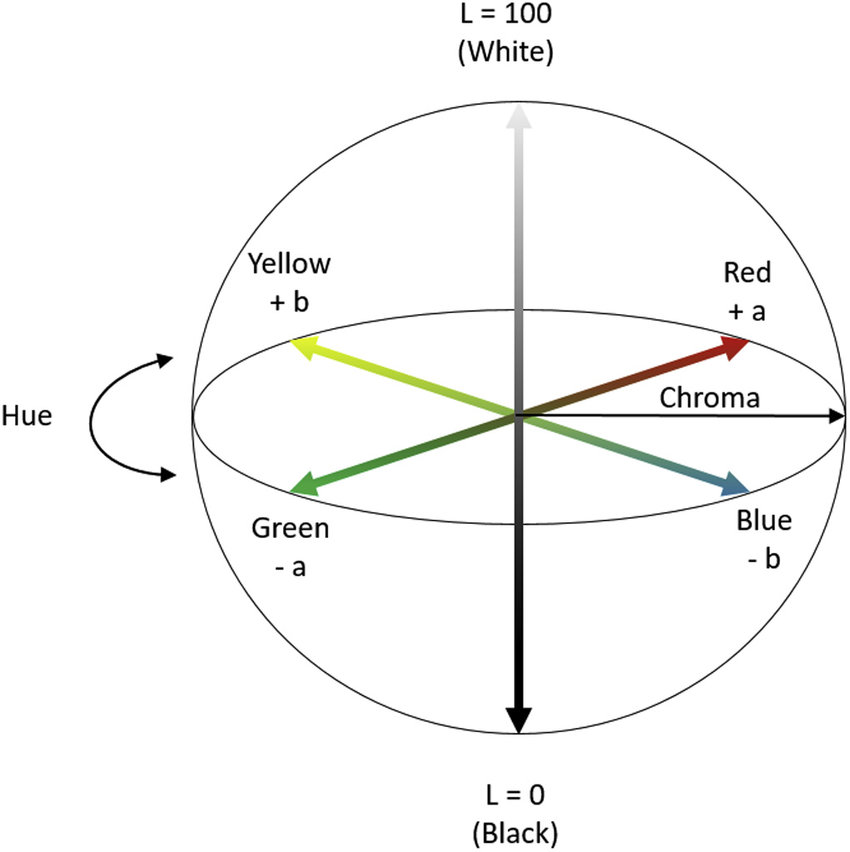 | width=100)

## LAB uses the three channels representing “L” (lightness), “a” (Red/Green) and “b” (Blue/Yellow)
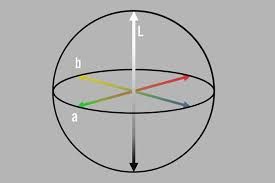

In [ ]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:

upl = files.upload()
names = list(upl.keys())


#The uploaded image will be in RGB format. To convert to Lab space, we use the processed_image() function
def processed_image(img): 
  image = img.resize( (256, 256), Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  # X-light, Y-color
  X, Y = lab[:,:,0], lab[:,:,1:]
  # X from 0 to 100
  Y /= 128    #output from -1 to 1
  X = X.reshape(1, size[0], size[1], 1) # batch, image sizes, one color channel
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size


for i in range(len(names)):

  img = Image.open(BytesIO(upl[names[i]]))

  X, Y, size = processed_image(img)

  model = Sequential()
  model.add(InputLayer(input_shape=(None, None, 1))) # input image with size and 1 color channel
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) #first convolutional layer with 64 channels with 3x3 filter
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)) # scanning step=2, so the output will be twice less
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
  model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2))) # increases the feature map by 2 times
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(2, (3, 3), activation='tanh', padding='same')) # activation function hyperbolic tangent
  model.add(UpSampling2D((2, 2)))

  model.compile(optimizer='adam', loss='mse')
  model.fit(x=X, y=Y, batch_size=i, epochs=50) # input X, output Y, 

  






Saving photo104.jpg to photo104 (2).jpg
Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0371
Epoch 2/50
1/1 [==============================] - 1s 927ms/step - loss: 0.9680
Epoch 3/50
1/1 [==============================] - 1s 920ms/step - loss: 1.0369
Epoch 4/50
1/1 [==============================] - 1s 924ms/step - loss: 0.9518
Epoch 5/50
1/1 [==============================] - 1s 905ms/step - loss: 0.9323
Epoch 6/50
1/1 [==============================] - 1s 910ms/step - loss: 0.2478
Epoch 7/50
1/1 [==============================] - 1s 921ms/step - loss: 0.0240
Epoch 8/50
1/1 [==============================] - 1s 920ms/step - loss: 0.0236
Epoch 9/50
1/1 [==============================] - 1s 934ms/step - loss: 0.0233
Epoch 10/50
1/1 [==============================] - 1s 911ms/step - loss: 0.0232
Epoch 11/50
1/1 [==============================] - 1s 914ms/step - loss: 0.0233
Epoch 12/50
1/1 [==============================] - 1s 909ms/step - loss: 0.0233
Epoch 13/50


## UpSampling2D:


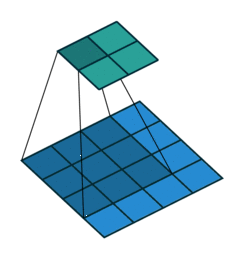

## Conv2D:

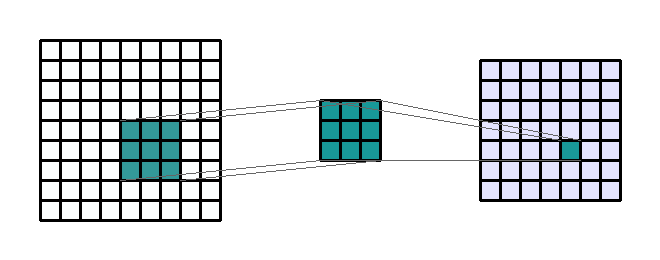



Saving chphoto11.jpg to chphoto11.jpg
1/1 [==============================] - 0s 400ms/step


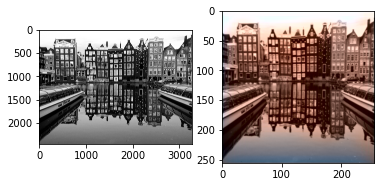

In [ ]:

upl = files.upload()
names = list(upl.keys())

for i in range(len(names)):

  img = Image.open(BytesIO(upl[names[i]]))
  X, Y, size = processed_image(img)
  output = model.predict(X)

  output *= 128 #we multiply output by 128, because Y was from -1 to 1
  min_vals, max_vals = -128, 127
  ab = np.clip(output[0], min_vals, max_vals) #create borders for our output
  
  cur = np.zeros((size[0], size[1], 3))
  cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
  cur[:,:,1:] = ab
  plt.subplot(1, 2, 1)
  plt.imshow(img)
  plt.subplot(1, 2, 2)
  plt.imshow(lab2rgb(cur))

